<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220726_Data_Science_Project_on_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/05/08/data-science-project-on-time-series/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Fremont-Bridge-Bicycle-Counts/master/fremont-bridge.csv', index_col='Date', parse_dates=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   West    45976 non-null  float64
 1   East    45976 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [8]:
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [9]:
data.columns

Index(['West', 'East'], dtype='object')

In [10]:
data.columns = ['west', 'east']

In [11]:
data.head()

,west,east
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [12]:
data['total'] = data['west'] + data['east']

In [13]:
data.head()

,west,east,total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [14]:
data.isnull().sum()

west     8
east     8
total    8
dtype: int64

In [17]:
data = data.dropna()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45976 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   west    45976 non-null  float64
 1   east    45976 non-null  float64
 2   total   45976 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [19]:
data.describe()

,west,east,total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

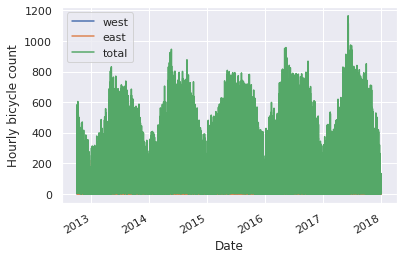

In [22]:
sns.set()
data.plot()
plt.ylabel('Hourly bicycle count')
plt.show()

In [23]:
weekly = data.resample('w').sum()
weekly.head()

,west,east,total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


In [24]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2012-10-07 to 2017-12-31
Freq: W-SUN
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   west    274 non-null    float64
 1   east    274 non-null    float64
 2   total   274 non-null    float64
dtypes: float64(3)
memory usage: 8.6 KB


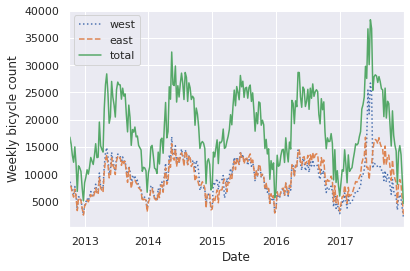

In [26]:
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

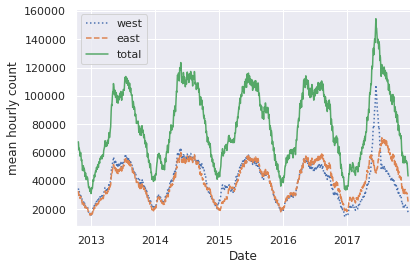

In [27]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

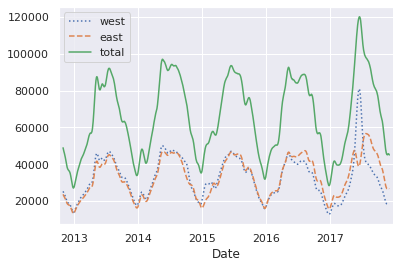

In [28]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

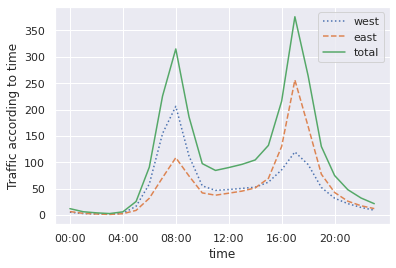

In [29]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()